# EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../reports/figures", exist_ok=True)

plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

SOURCE = "../datas/raw/capteur_C013.csv"


In [5]:
df = pd.read_csv(SOURCE)
df.head()

,nom_salle,capacite_salle,timestamp,pression,temperature,nb_eleves_presents,temperature_ext,humidite
0,C013,30,2025-08-20 22:00:00,1014.8,32.0,0,34.7,35.5
1,C013,30,2025-08-20 22:30:00,1014.9,31.0,0,33.0,35.6
2,C013,30,2025-08-20 23:00:00,1014.7,30.7,0,33.0,40.3
3,C013,30,2025-08-20 23:30:00,1014.5,29.9,0,31.7,36.6
4,C013,30,2025-08-21 00:00:00,1014.5,29.9,0,31.0,40.6


In [6]:
df.describe()

,capacite_salle,pression,temperature,nb_eleves_presents,temperature_ext,humidite
count,336.0,336.000000,336.000000,336.000000,336.000000,336.000000
mean,30.0,1009.574107,24.461012,6.958333,23.965774,46.001488
std,0.0,1.993770,3.538622,10.874785,5.512211,4.101718
min,30.0,1006.000000,17.500000,0.000000,13.600000,31.700000
25%,30.0,1008.100000,21.375000,0.000000,18.700000,43.775000
50%,30.0,1008.900000,24.750000,0.000000,24.050000,46.100000
75%,30.0,1010.900000,27.100000,15.250000,28.400000,48.825000
max,30.0,1014.900000,32.000000,30.000000,36.400000,56.600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nom_salle           336 non-null    object 
 1   capacite_salle      336 non-null    int64  
 2   timestamp           336 non-null    object 
 3   pression            336 non-null    float64
 4   temperature         336 non-null    float64
 5   nb_eleves_presents  336 non-null    int64  
 6   temperature_ext     336 non-null    float64
 7   humidite            336 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 21.1+ KB


In [8]:
df.isnull().sum()

nom_salle             0
capacite_salle        0
timestamp             0
pression              0
temperature           0
nb_eleves_presents    0
temperature_ext       0
humidite              0
dtype: int64

In [9]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


In [10]:
print(
    "Température intérieure min/max :", df["temperature"].min(), df["temperature"].max()
)
print(
    "Température extérieure min/max :",
    df["temperature_ext"].min(),
    df["temperature_ext"].max(),
)
print("Humidité min/max :", df["humidite"].min(), df["humidite"].max())
print("Pression min/max :", df["pression"].min(), df["pression"].max())
print(
    "Occupation min/max :",
    df["nb_eleves_presents"].min(),
    df["nb_eleves_presents"].max(),
)


Température intérieure min/max : 17.5 32.0
Température extérieure min/max : 13.6 36.4
Humidité min/max : 31.7 56.6
Pression min/max : 1006.0 1014.9
Occupation min/max : 0 30


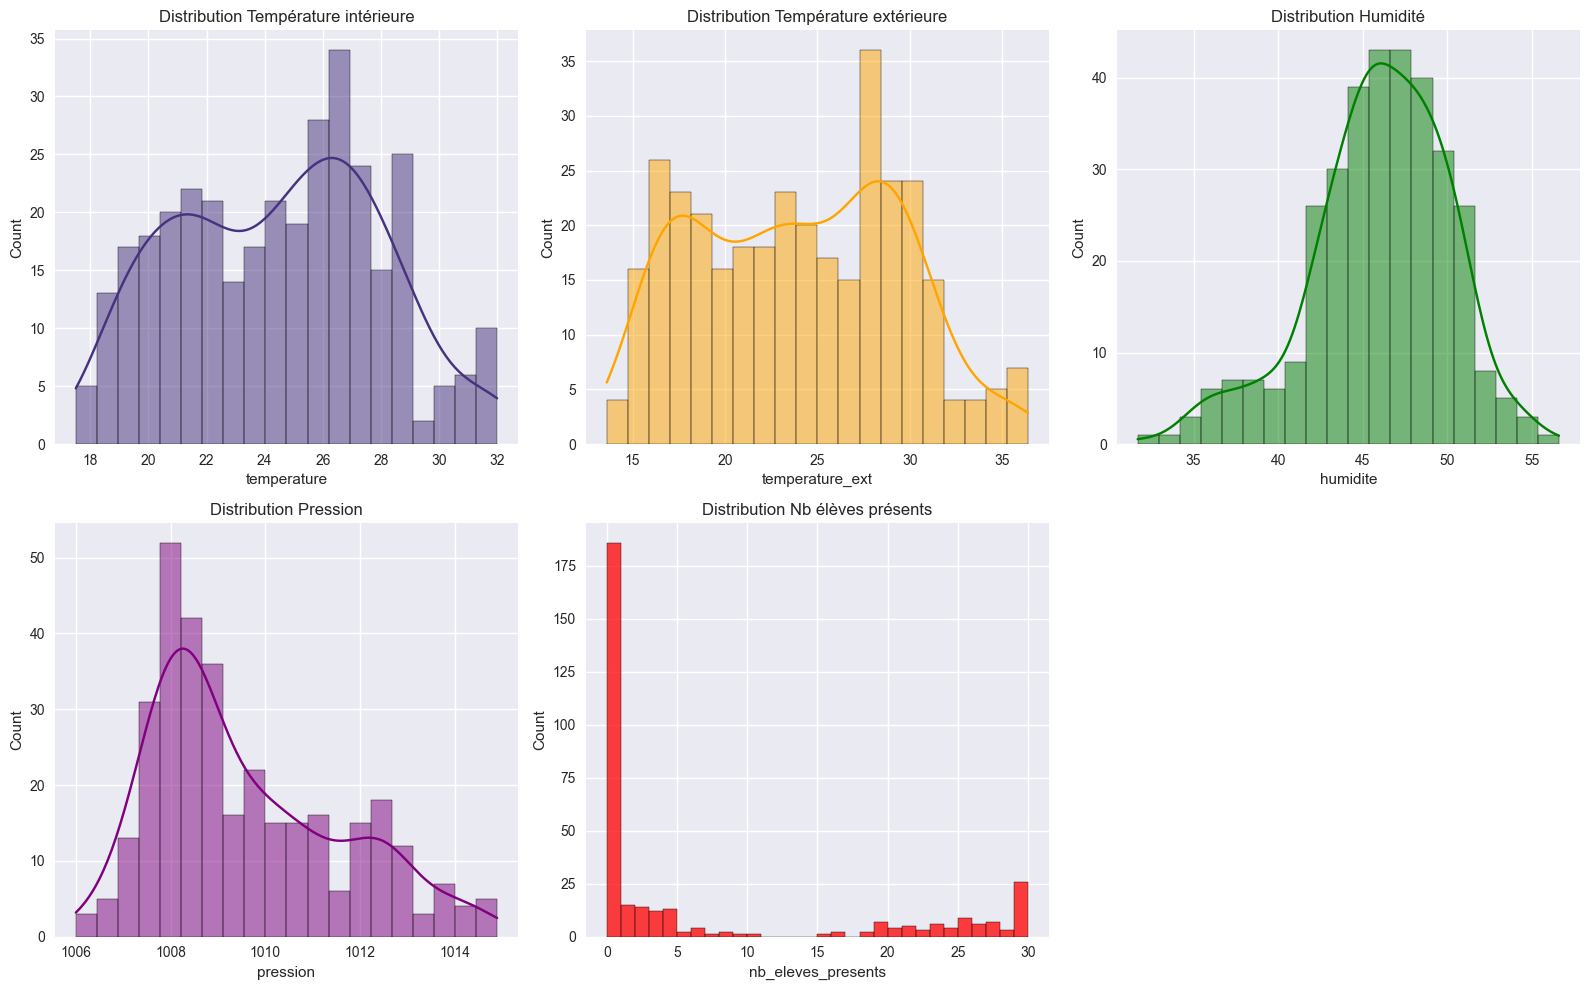

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.histplot(df["temperature"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution Température intérieure")

sns.histplot(df["temperature_ext"], bins=20, kde=True, ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Distribution Température extérieure")

sns.histplot(df["humidite"], bins=20, kde=True, ax=axes[0, 2], color="green")
axes[0, 2].set_title("Distribution Humidité")

sns.histplot(df["pression"], bins=20, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Distribution Pression")

sns.histplot(df["nb_eleves_presents"], bins=30, ax=axes[1, 1], color="red")
axes[1, 1].set_title("Distribution Nb élèves présents")

axes[1, 2].axis("off")

plt.tight_layout()
plt.savefig("../reports/figures/distributions_univariees.png")
plt.show()

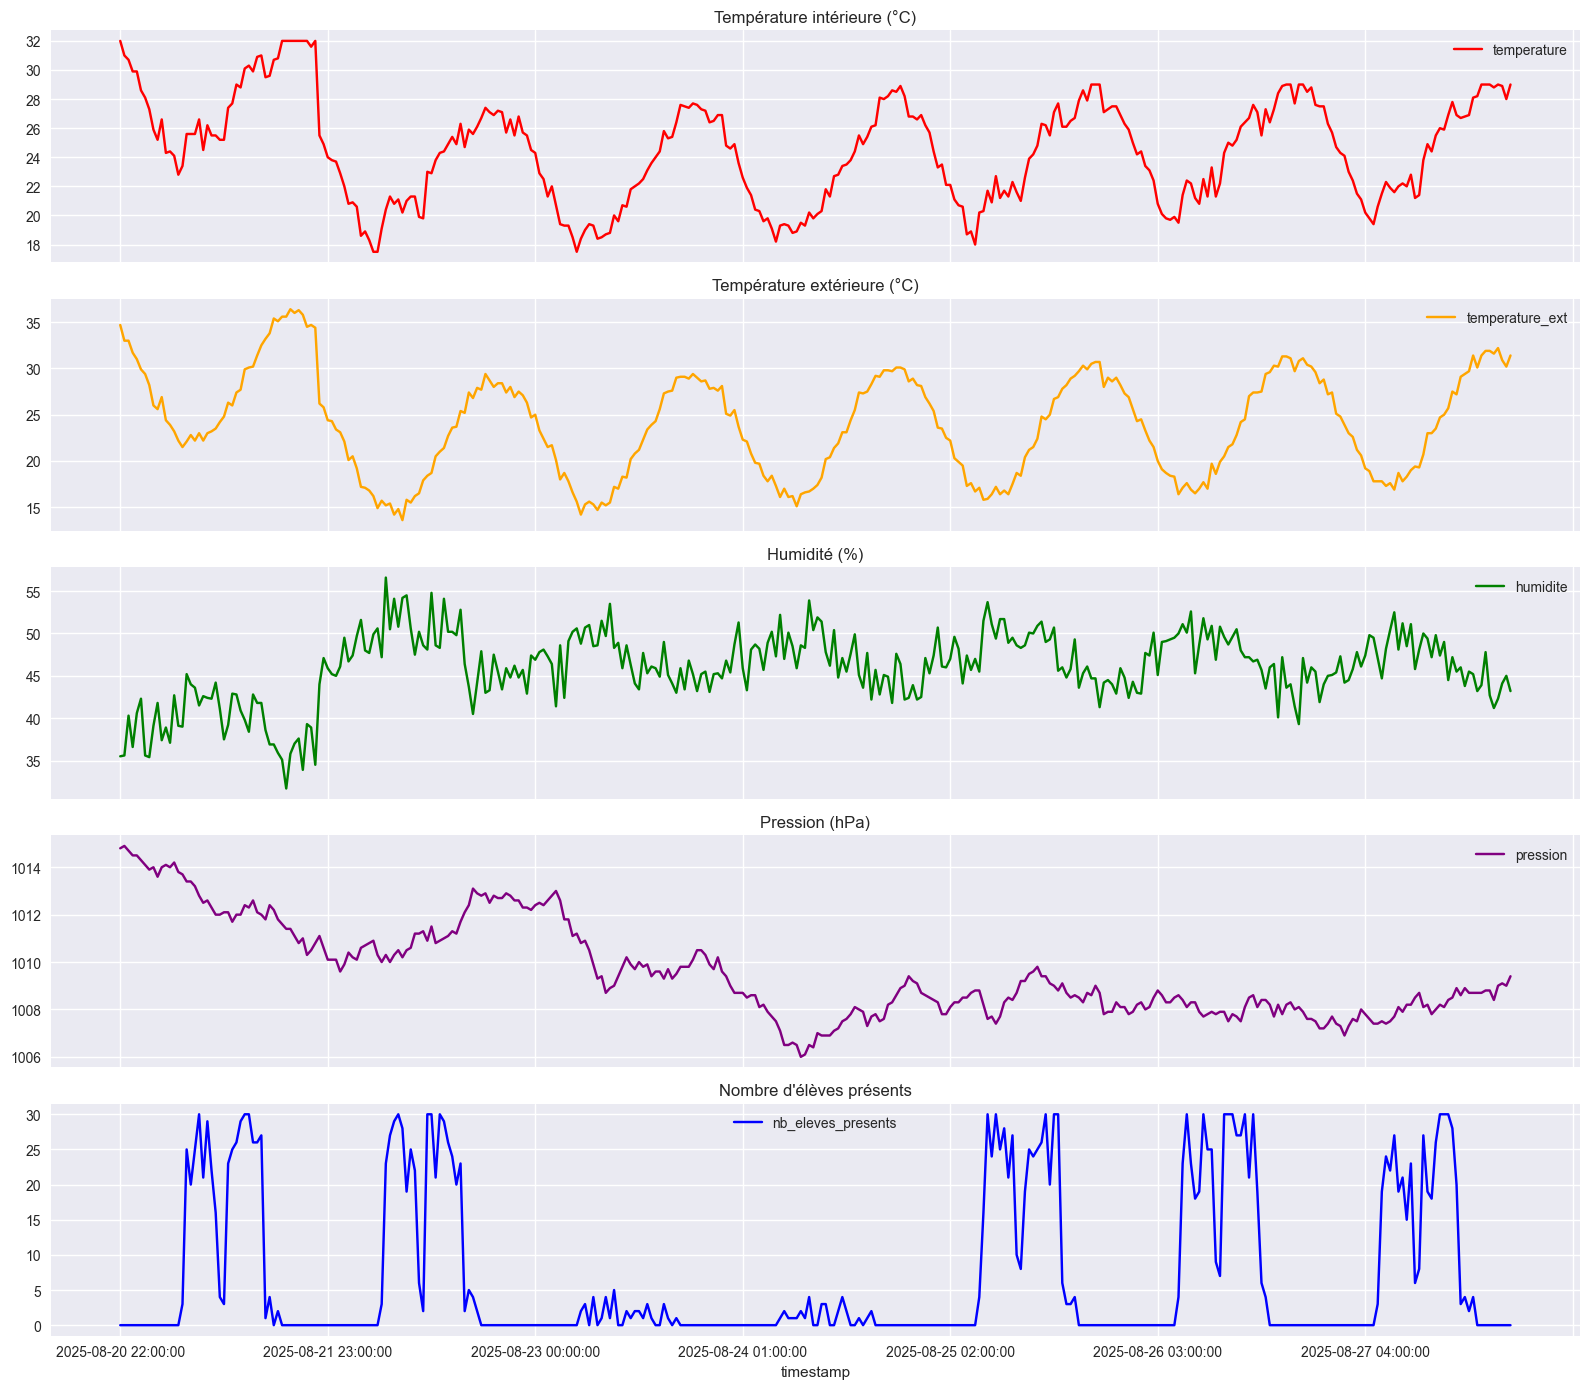

In [12]:
fig, axes = plt.subplots(5, 1, figsize=(16, 14), sharex=True)

df.plot(
    x="timestamp",
    y="temperature",
    ax=axes[0],
    title="Température intérieure (°C)",
    color="red",
)
df.plot(
    x="timestamp",
    y="temperature_ext",
    ax=axes[1],
    title="Température extérieure (°C)",
    color="orange",
)
df.plot(x="timestamp", y="humidite", ax=axes[2], title="Humidité (%)", color="green")
df.plot(x="timestamp", y="pression", ax=axes[3], title="Pression (hPa)", color="purple")
df.plot(
    x="timestamp",
    y="nb_eleves_presents",
    ax=axes[4],
    title="Nombre d'élèves présents",
    color="blue",
)

plt.tight_layout()
plt.savefig("../reports/figures/series_temporelles_completes.png")
plt.show()


In [13]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["jour"] = df["timestamp"].dt.date
df["heure"] = df["timestamp"].dt.hour

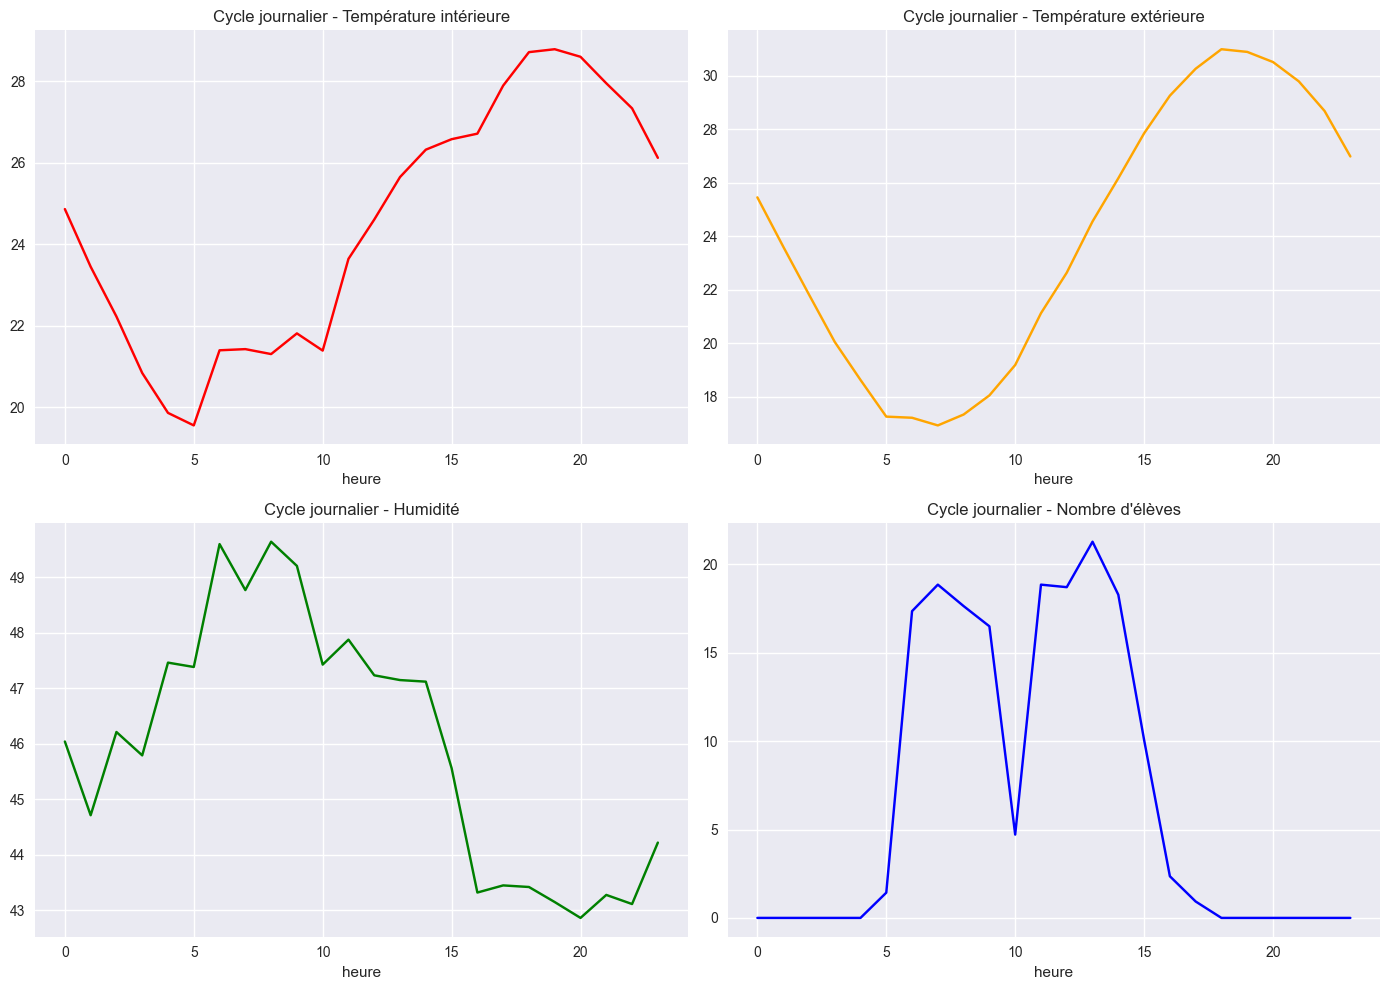

In [14]:
moyennes_horaires = df.groupby("heure")[
    ["temperature", "temperature_ext", "humidite", "nb_eleves_presents"]
].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

moyennes_horaires["temperature"].plot(
    ax=axes[0, 0], title="Cycle journalier - Température intérieure", color="red"
)
moyennes_horaires["temperature_ext"].plot(
    ax=axes[0, 1], title="Cycle journalier - Température extérieure", color="orange"
)
moyennes_horaires["humidite"].plot(
    ax=axes[1, 0], title="Cycle journalier - Humidité", color="green"
)
moyennes_horaires["nb_eleves_presents"].plot(
    ax=axes[1, 1], title="Cycle journalier - Nombre d'élèves", color="blue"
)

plt.tight_layout()
plt.savefig("../reports/figures/cycles_journaliers.png")
plt.show()


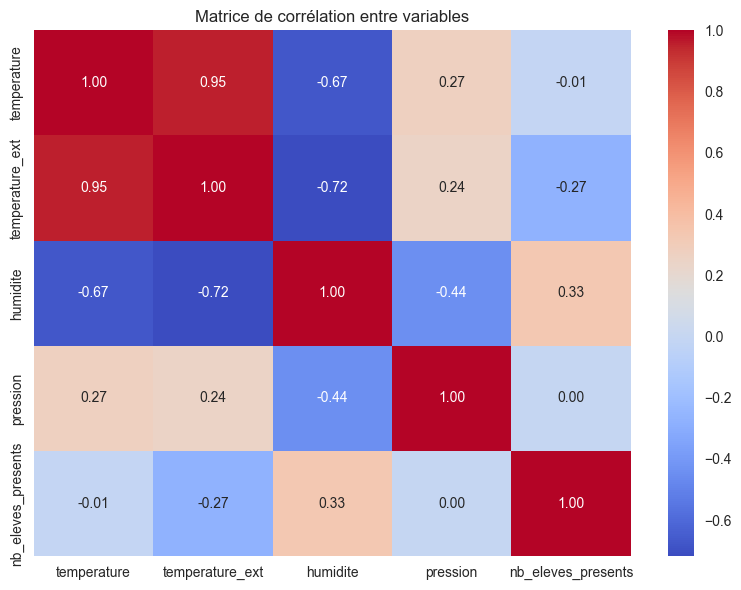

In [15]:
colonnes_numeriques = [
    "temperature",
    "temperature_ext",
    "humidite",
    "pression",
    "nb_eleves_presents",
]

correlation = df[colonnes_numeriques].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matrice de corrélation entre variables")
plt.tight_layout()
plt.savefig("../reports/figures/matrice_correlation.png")
plt.show()


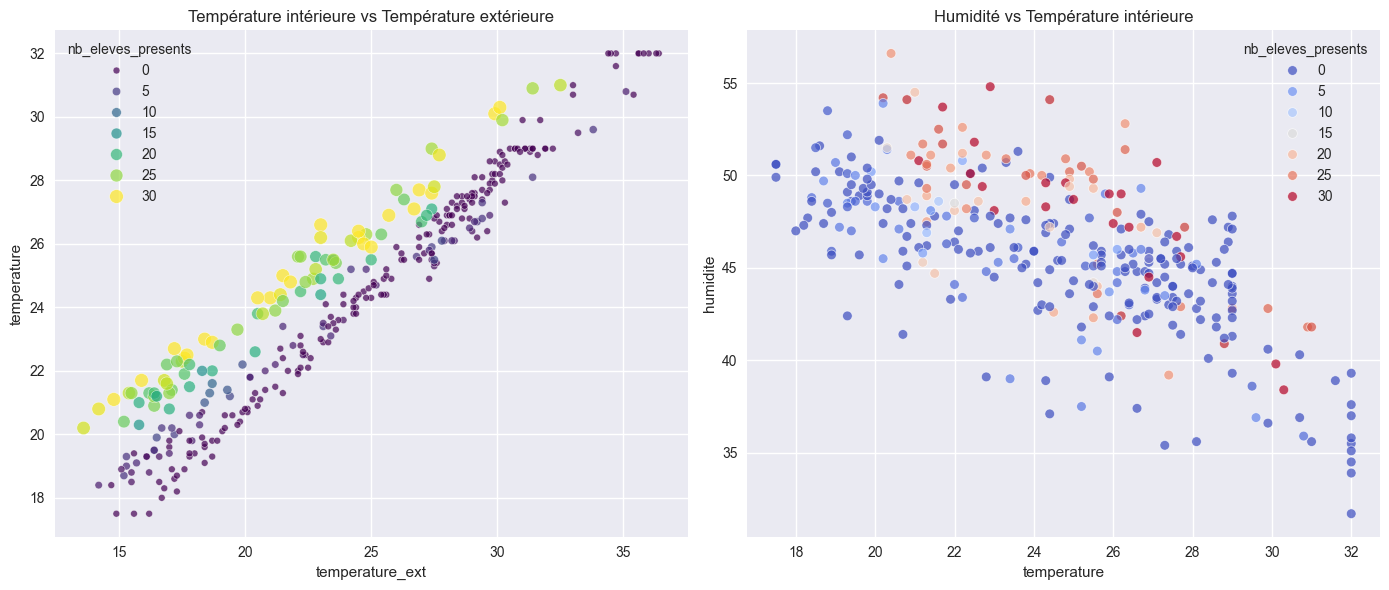

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    x="temperature_ext",
    y="temperature",
    hue="nb_eleves_presents",
    size="nb_eleves_presents",
    data=df,
    ax=axes[0],
    palette="viridis",
    alpha=0.7,
)
axes[0].set_title("Température intérieure vs Température extérieure")

sns.scatterplot(
    x="temperature",
    y="humidite",
    hue="nb_eleves_presents",
    data=df,
    ax=axes[1],
    palette="coolwarm",
    alpha=0.7,
)
axes[1].set_title("Humidité vs Température intérieure")

plt.tight_layout()
plt.savefig("../reports/figures/scatterplots_relation.png")
plt.show()


In [17]:
anomalies_occupation = df[df["nb_eleves_presents"] > df["capacite_salle"]]

print(f"Nombre de cas où la capacité est dépassée : {anomalies_occupation.shape[0]}")
if not anomalies_occupation.empty:
    display(anomalies_occupation.head())

Nombre de cas où la capacité est dépassée : 0


In [18]:
anomalies_temp = df[(df["temperature"] < 15) | (df["temperature"] > 35)]

anomalies_hum = df[(df["humidite"] < 20) | (df["humidite"] > 100)]

anomalies_press = df[(df["pression"] < 980) | (df["pression"] > 1050)]

print("Anomalies température :", anomalies_temp.shape[0])
print("Anomalies humidité :", anomalies_hum.shape[0])
print("Anomalies pression :", anomalies_press.shape[0])


Anomalies température : 0
Anomalies humidité : 0
Anomalies pression : 0


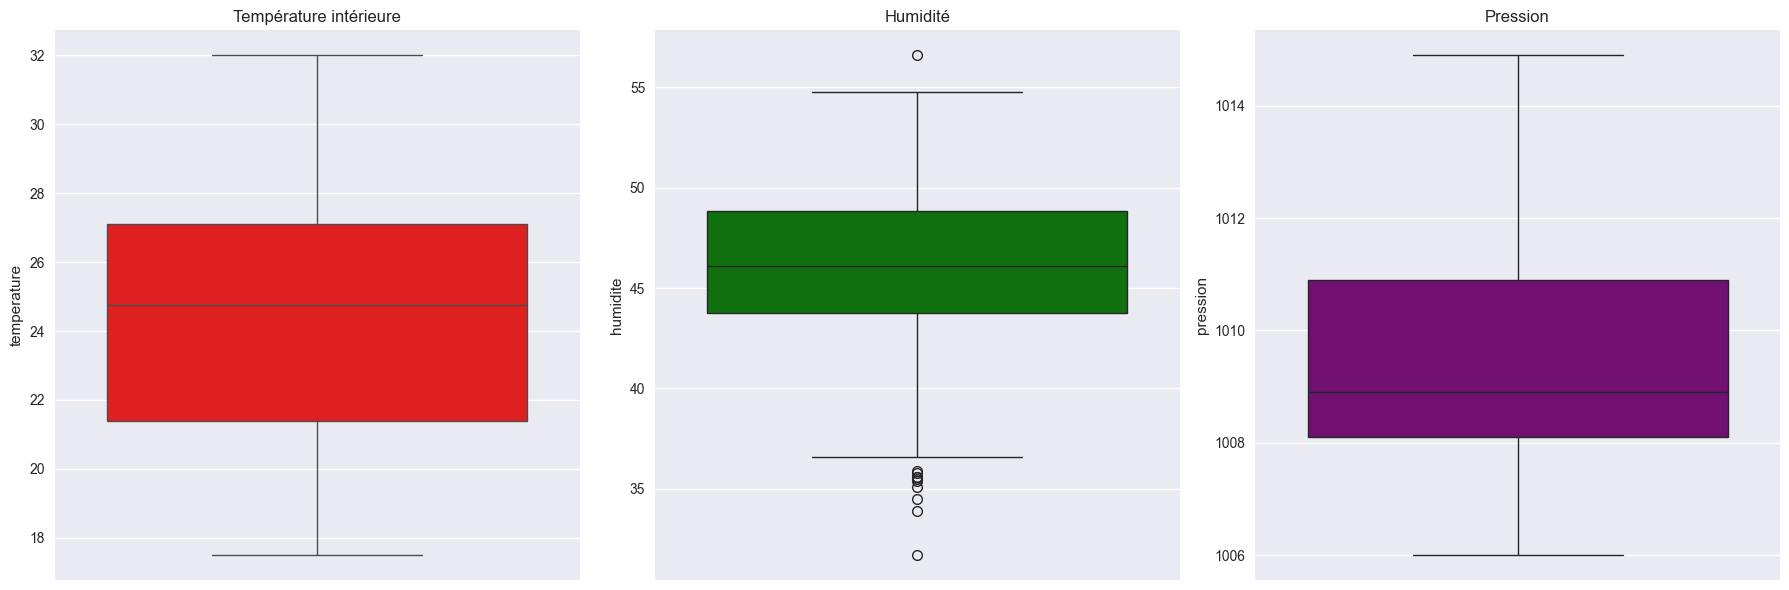

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y="temperature", data=df, ax=axes[0], color="red")
axes[0].set_title("Température intérieure")

sns.boxplot(y="humidite", data=df, ax=axes[1], color="green")
axes[1].set_title("Humidité")

sns.boxplot(y="pression", data=df, ax=axes[2], color="purple")
axes[2].set_title("Pression")

plt.tight_layout()
plt.savefig("../reports/figures/valeurs_extremes.png")
plt.show()


## Synthèse

### 1. Qualité des données

- Pas de valeurs manquantes détectées.
- Pas de doublons.

### 2. Occupation

- La salle est occupée uniquement entre 7h30 et 19h30.
- Le nombre d’élèves ne dépasse pas la capacité (30).
- Cycle typique : pic en matinée et après-midi, baisse autour de 12h (pause déjeuner).
- Faible ou aucune occupation le week-end.

### 3. Température

- Corrélée à la température extérieure et au nombre d’élèves présents.

### 4. Humidité

- Tendance inverse à la température (plus il fait chaud, plus l’air est sec).
- Augmente légèrement avec l’occupation (respiration des élèves ?).

### 5. Pression

- Fluctuations faibles.
- Pas de lien direct avec occupation.

### 6. Relations entre variables

- temperature_ext ↔ temperature : corrélation forte.
- nb_eleves_presents ↔ temperature : corrélation modérée.
- temperature ↔ humidite : corrélation négative nette.


### Conclusion

On observe clairement l’effet de l’occupation et de la météo exterieur sur la température de la salle